# Implementación del circuito de Codificación Superdensa en la plataforma Qiskit de IBM.

***********************************************************************************************
Para esta implementación se ha tenido en cuenta la descripción del circuito dada en el siguiente tutorial del libro de Qiskit:

https://qiskit.org/textbook/ch-algorithms/superdense-coding.html

Además se han tomando instrucciones e ideas del tutorial de la comunidad de desarrolladores de Qiskit disponible en:

https://github.com/Qiskit/qiskit-community-tutorials/blob/master/terra/qis_intro/teleportation_superdensecoding.ipynb

******************************************************************
### Curso de Computación Cuántica
### Prof. Gustavo Patino

Departamento de Ingeniería Electrónica y Telecomunicaciones

Facultad de Ingeniería

Universidad de Antioquia

Medellin, 2020-2025

******************************************************************

In [83]:
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
# from qiskit import transpile

# from qiskit.quantum_info import Operator, Statevector, DensityMatrix, random_statevector

from qiskit.visualization import plot_distribution, plot_bloch_multivector
# from qiskit.visualization import array_to_latex
# from qiskit.visualization import plot_state_city

from qiskit_aer import AerSimulator

In [84]:
# Descomente la siguiente linea si desea ver las imágenes más grandes.
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

In [85]:
#Función para crear el estado de Bell OO.
def crear_estado_bell01(qc, a, b):
    qc.x(a) # Apply a h-gate to the first qubit
    qc.h(a) # Apply a h-gate to the first qubit
    qc.cx(a,b) # Apply a CNOT, using the first qubit as the control

In [86]:
# Define a function that takes a QuantumCircuit (qc)
# a qubit index (qubit) and a message string (msg)
def Alice_codificar_mensaje(qc, qubit, msg):
    if msg == "01":
        pass    # To send 00 we do nothing
    elif msg == "11":
        qc.x(qubit) # To send 10 we apply an X-gate
    elif msg == "00":
        qc.z(qubit) # To send 01 we apply a Z-gate
    elif msg == "10":
        qc.z(qubit) # To send 11, we apply a Z-gate
        qc.x(qubit) # followed by an X-gate
    else:
        print("Mensaje invalido: Se enviará '01'")

In [87]:
def Bob_decodificar_mensaje(qc, a, b):
    qc.cx(a,b)
    qc.h(a)

    Bob_m0 = ClassicalRegister(1, "Bob_m0")
    Bob_m1 = ClassicalRegister(1, "Bob_m1")
    qc.add_register(Bob_m1)
    qc.add_register(Bob_m0)

    qc.barrier()

    qc.measure(a, Bob_m1)
    qc.measure(b, Bob_m0)

In [88]:
# Create the quantum register with 2 qubits (One for Alice, one for Bob.)
entrelaz_qbit0 = QuantumRegister(1, "A")
entrelaz_qbit1 = QuantumRegister(1, "B")

# Create the quantum circuit for the Superdense Coding Protocol
Circuito_cod_superdensa = QuantumCircuit(entrelaz_qbit0, entrelaz_qbit1)

In [89]:
crear_estado_bell01(Circuito_cod_superdensa, entrelaz_qbit0 , entrelaz_qbit1)

Circuito_cod_superdensa.barrier() # This adds a barrier to our circuit. A barrier 
             # separates the gates in our diagram and makes it 
             # clear which part of the circuit is which

# At this point, qubit 0 goes to Alice and qubit 1 goes to Bob

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'A'), 0), Qubit(QuantumRegister(1, 'B'), 0)), clbits=())

In [90]:
# Next, Alice encodes her message onto qubit 0. In this case,
# we want to send the message '01'. You can try changing this
# value and see how it affects the circuit

mensaje_de_alice = "11"

In [91]:
Alice_codificar_mensaje(Circuito_cod_superdensa, entrelaz_qbit0, mensaje_de_alice)
Circuito_cod_superdensa.barrier()
# Alice then sends her qubit to Bob.

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'A'), 0), Qubit(QuantumRegister(1, 'B'), 0)), clbits=())

In [92]:
# After recieving qubit 0, Bob applies the recovery protocol:
Bob_decodificar_mensaje(Circuito_cod_superdensa, entrelaz_qbit0, entrelaz_qbit1)

In [93]:
# # Finally, Bob measures his qubits to read Alice's message
# Circuito_cod_superdensa.measure_all()

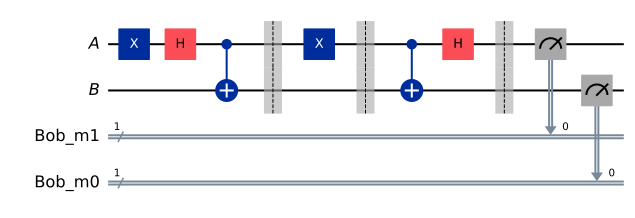

In [94]:
# Draw our output
Circuito_cod_superdensa.draw(output = "mpl")

In [95]:
sim_result = AerSimulator().run(Circuito_cod_superdensa).result()

Measured 1 1 with frequency 1024


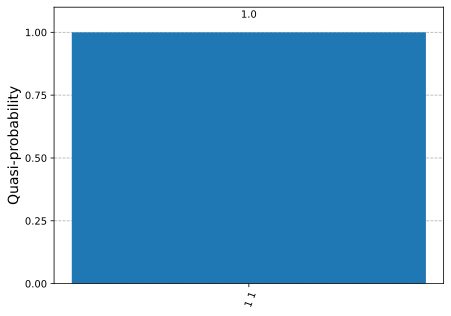

In [96]:
measurement_result = sim_result.get_counts(Circuito_cod_superdensa)

for outcome, frequency in measurement_result.items():
    print(f"Measured {outcome} with frequency {frequency}")

plot_distribution(measurement_result)

In [97]:
from qiskit import __version__
print(__version__)

1.3.2
